In [2]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [3]:
import numpy as np
import pandas as pd 
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 데스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from matplotlib import pyplot as plt # 학습과정 loss, acc 시작화
# quiz에서는 scale 조정, train_test_split 등을 추가

In [4]:
# 1. 데이터셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

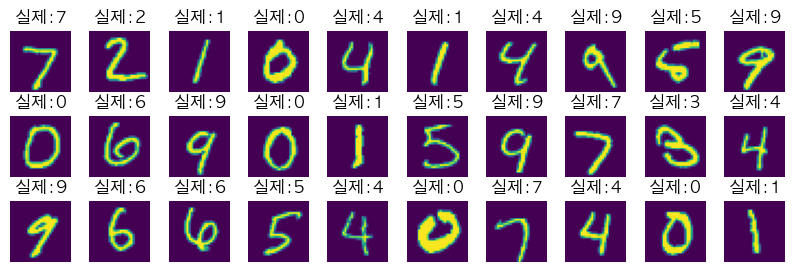

In [5]:
plt_row = 3
plt_col = 10

# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = [plt_col, plt_row]
plt.rc('font', family="AppleGothic") # window에서 한글 시각화
# plt.rc('font', family='NanumBarunGothic') # 코랩에서 한글 시각화

fig, axes =plt.subplots(plt_row, plt_col)

# # axes[0,0].imshow(X_test[0].reshape(width, height))
# axes[0,0].imshow(X_test[0])
# axes[0,0].axis('off')
# title='실재:{}'.format(y_test[0])
# axes[0,0].set_title(title)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
for i in range(plt_row*plt_col):
    subax = axes[i//plt_col, i%plt_col] # //: 몱연산자, %:skajwldustkswk
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title='실제:{}'.format(y_test[i])
    subax.set_title(title)


# 1. DNN

In [6]:
%%time
# 1. 데이터 생성 및 전처리
width=28; height=28

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_val = X_train[50000:]
y_val = y_train[50000:]

X_train = X_train[:50000]
y_train = y_train[:50000]

# 독립변수 (28, 28) → 784 1차원 → 실수형변환 → 스케일 조정

X_train = X_train.reshape(-1, width*height).astype('float32') / 255.0
X_val = X_val.reshape(-1, width*height).astype('float32') / 255.0
X_test = X_test.reshape(-1, width*height).astype('float32') / 255.0
# 타켓변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val= to_categorical(y_val)
Y_test = to_categorical(y_test)


X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

# 2. 모델구성
model = Sequential([
    Input(shape=(width*height,)),
    Dense(units=1024, activation='relu'),
    Dropout(0.3),
    Dense(units=512, activation='relu'),
    Dropout(0.3),
    Dense(units=256, activation='relu'),
    Dropout(0.2),
    Dense(units=10, activation='softmax'),
])

model.summary()


# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
hist = model.fit(X_train, Y_train,
                epochs=50,
                validation_data=(X_val, Y_val),
                verbose=1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,462,538 (5.58 MB)

 Trainable params: 1,462,538 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8649 - loss: 0.4312 - val_accuracy: 0.9591 - val_loss: 0.1301
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9599 - loss: 0.1371 - val_accuracy: 0.9731 - val_loss: 0.1008
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9677 - loss: 0.1107 - val_accuracy: 0.9696 - val_loss: 0.1027
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9737 - loss: 0.0866 - val_accuracy: 0.9739 - val_loss: 0.0916
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9763 - loss: 0.0803 - val_accuracy: 0.9772 - val_loss: 0.0945
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9795 - loss: 0.0705 - val_accuracy: 0.9766 - val_loss: 0.0856
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9799 - loss: 0.0656 - val_accuracy: 0.9778 - val_loss: 0.0853
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9826 -

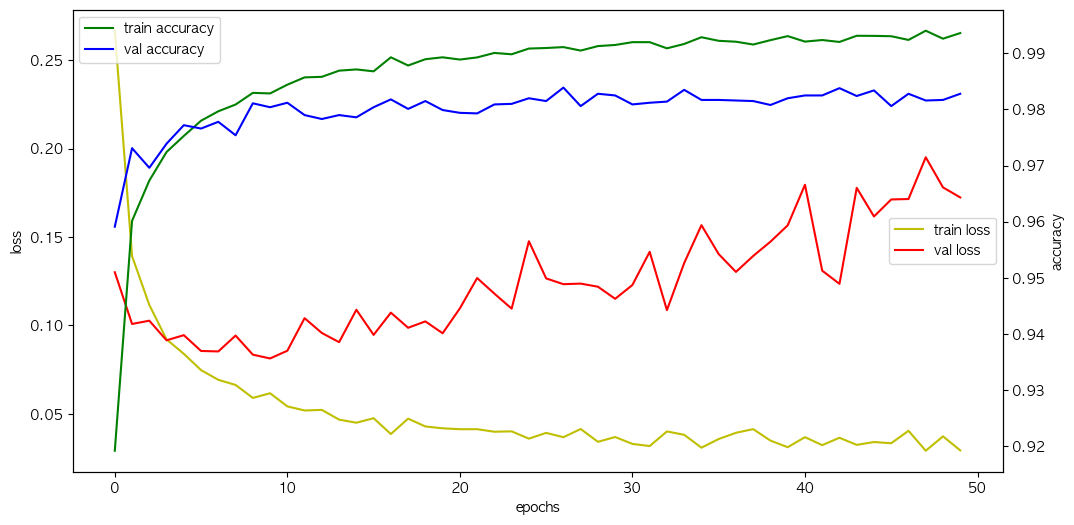

In [8]:
# 그래프
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()


In [9]:
model.save('./model/mnlist_dnn.h5')

In [10]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9809 - loss: 0.1608


[0.13919174671173096, 0.983299970626831]

In [11]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
print('실제값 :', y_test)
print('실제값 :', np.argmax(Y_test, axis=1))

yhat = model.predict(X_test).argmax(axis=1)
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

실제값 : [7 2 1 ... 4 5 6]
실제값 : [7 2 1 ... 4 5 6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ 972,    0,    0,    1,    0,    0,    3,    1,    3,    0],
       [   0, 1128,    2,    0,    0,    0,    2,    0,    3,    0],
       [   2,    0, 1011,    3,    2,    0,    2,    3,    9,    0],
       [   1,    0,    5,  989,    0,    2,    0,    4,    1,    8],
       [   0,    1,    0,    0,  961,    0,    6,    2,    1,   11],
       [   1,    0,    0,    6,    0,  872,    4,    1,    7,    1],
       [   2,    2,    0,    0,    1,    3,  948,    0,    2,    0],
       [   1,    1,    7,    0,    1,    0,    0, 1011,    2,    5],
       [   1,    1,    0,    4,    2,    3,    2,    4,  953,    4],
       [   2,    3,    1,    5,    5,    1,    0,    2,    2,  988]])

In [12]:
# 실재값과 예측값이 다른 갯수(방법1)
cnt = 0

for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i != j:
            cnt += data

print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 167


In [14]:
# 실재값과 예측값이 다른 갯수(방법2)
cnt = 0

for y, h in zip(y_test, yhat):
    print(y, h)
    if y != h:
        cnt += 1

print('예측이 틀린 갯수 :', cnt)

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 6
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
3 3
4 4
9 9
6 6
6 6
5 5
4 4
0 0
7 7
4 4
0 0
1 1
3 3
1 1
3 3
4 4
7 7
2 2
7 7
1 1
2 2
1 1
1 1
7 7
4 4
2 2
3 3
5 5
1 1
2 2
4 4
4 4
6 6
3 3
5 5
5 5
6 6
0 0
4 4
1 1
9 9
5 5
7 7
8 8
9 9
3 3
7 7
4 4
6 6
4 4
3 3
0 0
7 7
0 0
2 2
9 9
1 1
7 7
3 3
2 2
9 9
7 7
7 7
6 6
2 2
7 7
8 8
4 4
7 7
3 3
6 6
1 1
3 3
6 6
9 9
3 3
1 1
4 4
1 1
7 7
6 6
9 9
6 6
0 0
5 5
4 4
9 9
9 9
2 2
1 1
9 9
4 4
8 8
7 7
3 3
9 9
7 7
4 4
4 4
4 4
9 9
2 2
5 5
4 4
7 7
6 6
7 7
9 9
0 0
5 5
8 8
5 5
6 6
6 6
5 5
7 7
8 8
1 1
0 0
1 1
6 6
4 4
6 6
7 7
3 3
1 1
7 7
1 1
8 8
2 2
0 0
2 2
9 9
9 9
5 5
5 5
1 1
5 5
6 6
0 0
3 3
4 4
4 4
6 6
5 5
4 4
6 6
5 5
4 4
5 5
1 1
4 4
4 4
7 7
2 2
3 3
2 2
7 7
1 1
8 8
1 1
8 8
1 1
8 8
5 5
0 0
8 8
9 9
2 2
5 5
0 0
1 1
1 1
1 1
0 0
9 9
0 0
3 3
1 1
6 6
4 4
2 2
3 3
6 6
1 1
1 1
1 1
3 3
9 9
5 5
2 2
9 9
4 4
5 5
9 9
3 3
9 9
0 0
3 3
6 6
5 5
5 5
7 7
2 2
2 2
7 7
1 1
2 2
8 8
4 4
1 1
7 7
3 3
3 3
8 8
8 8
7 7
9 9
2 2
2 2
4 4
1 1
5 5
9 9
8 8
7 7
2 2
3 3
0 0
4 6
4 4
2 2


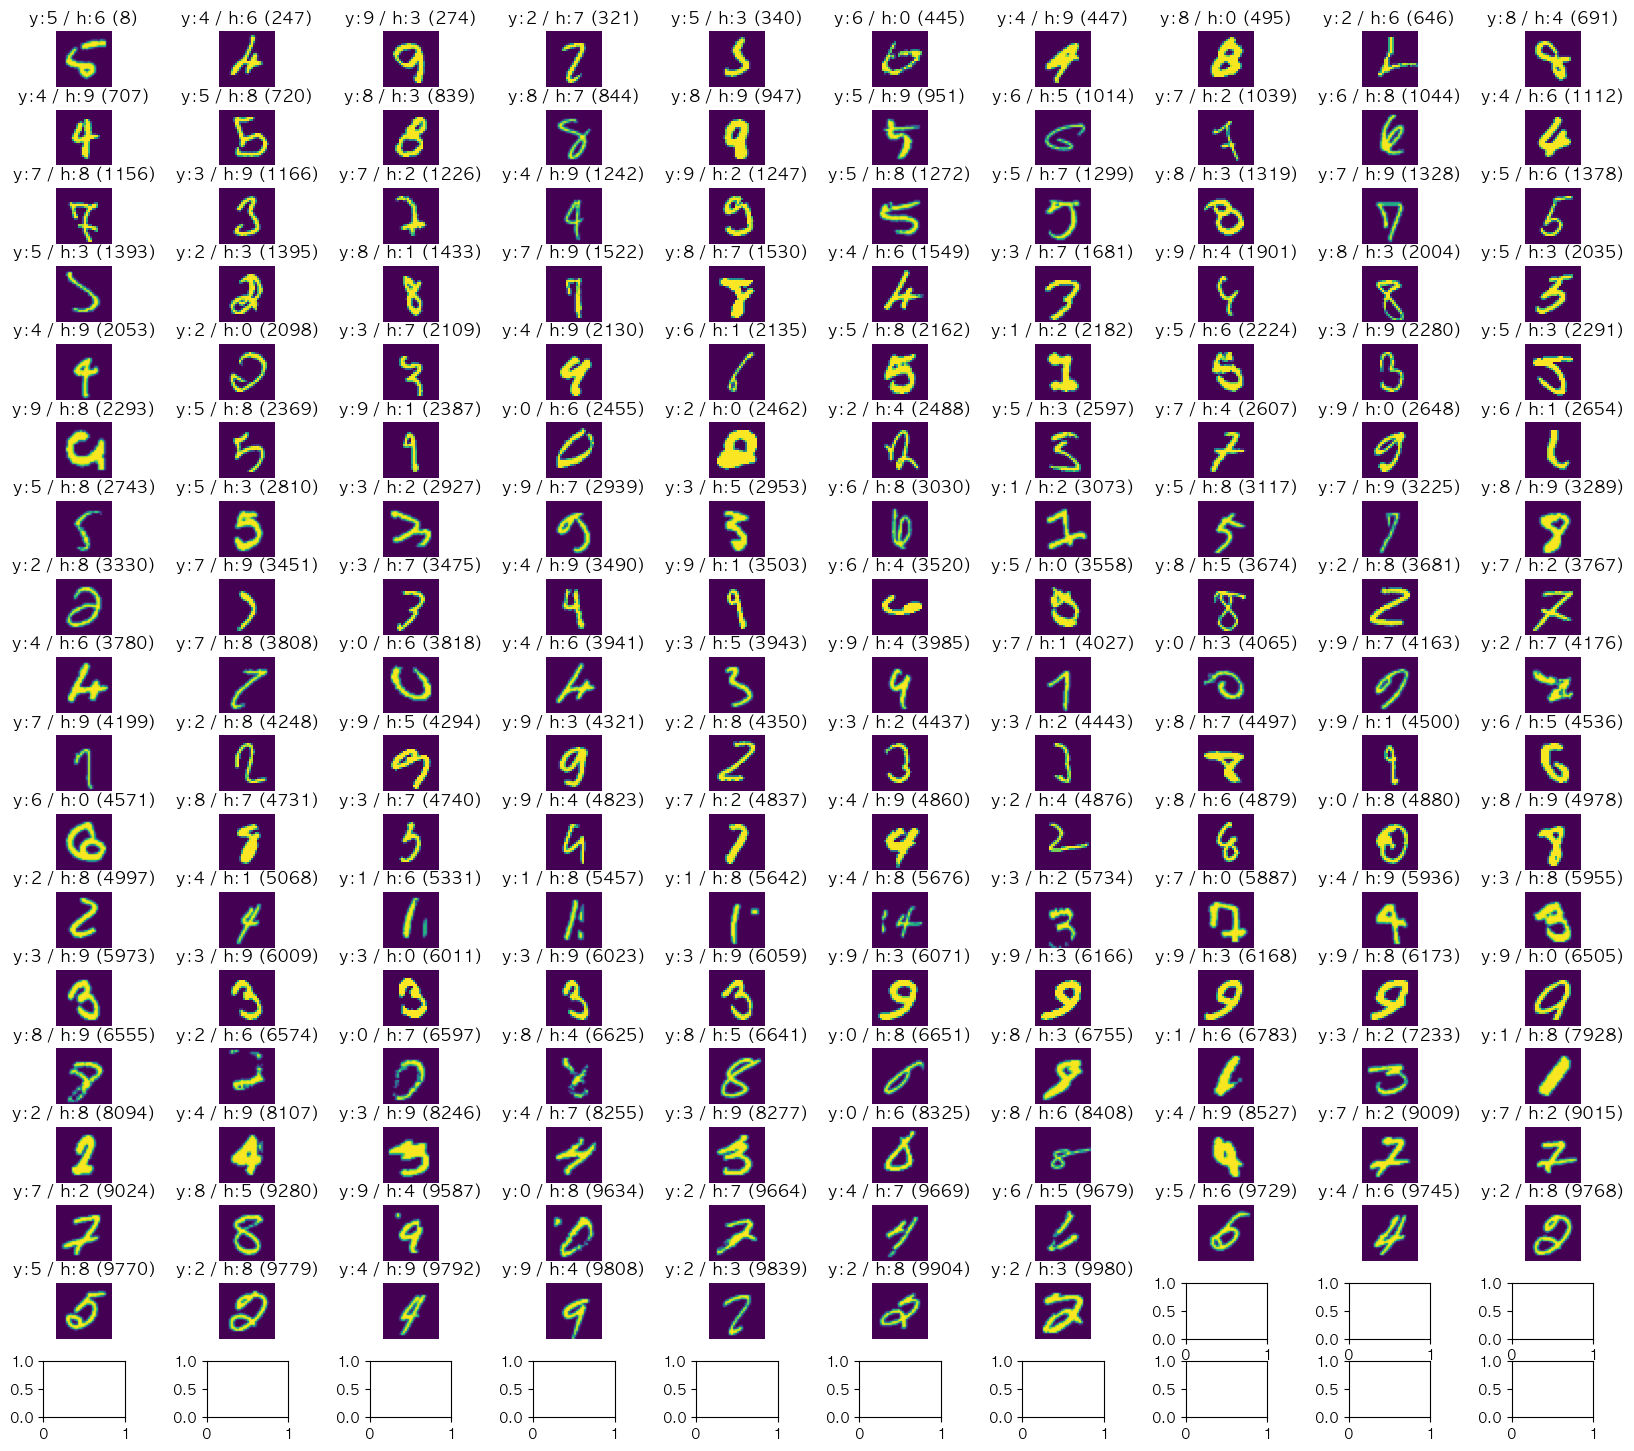

In [15]:
# CNN 을 사용하여, 에측이 틀린 데이터 출력(yhat과 y_test가 다른 겻들 172개)
plt_row = 18
plt_col = 10

# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = [plt_col+10, plt_row]
plt.rc('font', family="AppleGothic") # window에서 한글 시각화
# plt.rc('font', family='NanumBarunGothic') # 코랩에서 한글 시각화

fig, axes =plt.subplots(plt_row, plt_col)

plt.subplots_adjust(hspace=0.4, wspace=1)

# for i in range(plt_row*plt_col):
i = 0 # yhat과 y_test의 index → yhat[i], y_test[i]를 비교.
cnt = 0 # 이미지 출력횟수

while (i < len(y_test)) & (cnt < plt_row*plt_col):
    if yhat[i] == y_test[i]:
        i += 1
        continue

    subax = axes[cnt//plt_col, cnt%plt_col] # //: 몱연산자, %:skajwldustkswk
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title='y:{} / h:{} ({})'.format(y_test[i], yhat[i], i)

    subax.set_title(title)
    cnt += 1 # 이미지 출력 번호 증가
    i += 1 # index 증가

# CNN (컨볼루션 레이어 포함) - 교안 31 page